In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.info()
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [21]:
# eading the dataset from a CSV file into a DataFrame and displaying 
# its first few rows, information, and descriptive statistics.
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [22]:
# Selecting the predictor variables ('Age' and 'EstimatedSalary') 
# and the target variable ('Purchased') from the DataFrame.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (300, 2), Y: (300,)
Test  Dataset Size - X: (100, 2), Y: (100,)


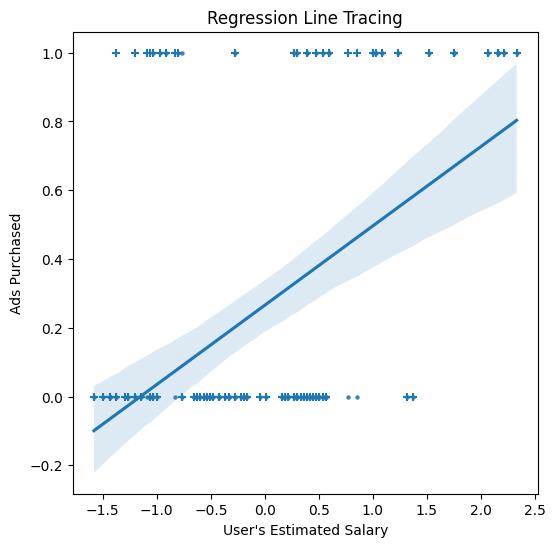

In [23]:
# Splitting the data into training and testing sets
# using train_test_split. Scaling the features using StandardScaler.

from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(random_state = 0, solver='lbfgs' )
lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

# Importing LogisticRegression from scikit-learn, creating an instance of the model,
# fitting the model to the training data, and making predictions on the testing data.

plt.figure(figsize=(6, 6));
sns.regplot(x = X_test[:, 1], y = predictions, scatter_kws={'s':5});
plt.scatter(X_test[:, 1], Y_test, marker = '+');
plt.xlabel("User's Estimated Salary");
plt.ylabel('Ads Purchased');
plt.title('Regression Line Tracing');

### Confusion matrix

In [24]:
# Visualizing the regression line and scatter plot of the predictions and actual values.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, predictions)
print(f'''Confusion matrix :\n
               | Positive Prediction\t| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
---------------+------------------------+----------------------
Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n\n''')

cm = classification_report(Y_test, predictions)
print('Classification report : \n', cm)

Confusion matrix :

               | Positive Prediction	| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) 65	| False Negative (FN) 3
---------------+------------------------+----------------------
Negative Class | False Positive (FP) 8	| True Negative (TN) 24


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



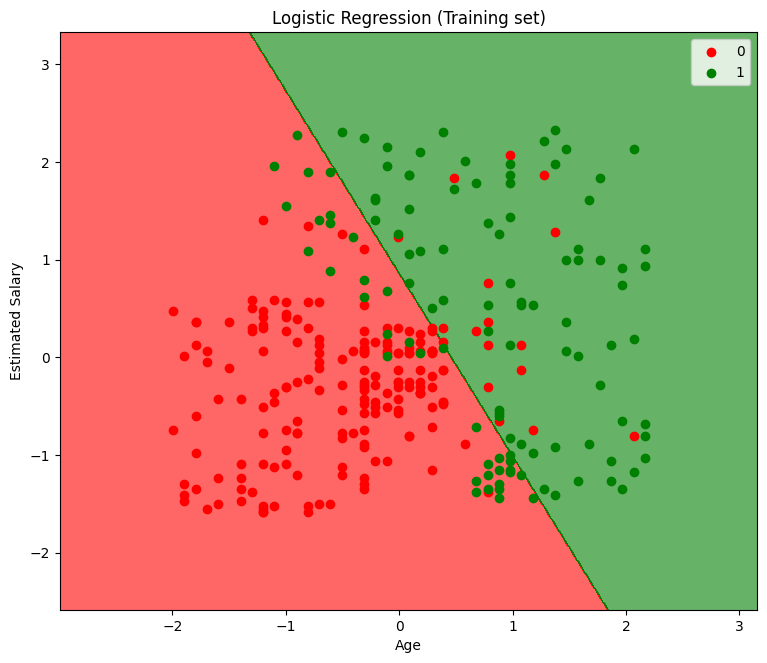

In [25]:
# Visualizing the Training set results
# Calculating and printing the confusion matrix and classification report.

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(9, 7.5));
plt.contourf(X1, X2, lm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max());
plt.ylim(X2.min(), X2.max());
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Logistic Regression (Training set)');
plt.xlabel('Age');
plt.ylabel('Estimated Salary');
plt.legend();
plt.show();

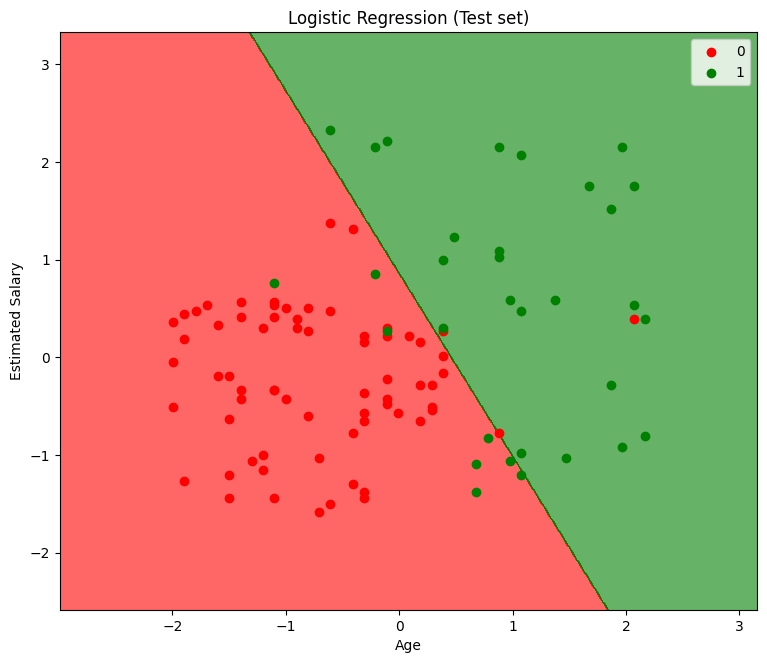

In [26]:
# Visualizing the Test set results
# Visualizing the decision boundary and training set results.

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(9, 7.5));
plt.contourf(X1, X2, lm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max());
plt.ylim(X2.min(), X2.max());
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Logistic Regression (Test set)');
plt.xlabel('Age');
plt.ylabel('Estimated Salary');
plt.legend();
plt.show();

In [27]:


# In this code section:

# The logistic regression model is trained and tested.
# A scatter plot with a regression line is plotted to visualize the relationship between the estimated salary and ads purchased.
# The confusion matrix and classification report are calculated and printed, providing insights into the model's performance.
# The training set results are visualized by plotting the decision boundary and the data points.
# The test set results a

In [18]:
# In the given code, we have performed logistic regression on a dataset to predict whether a user will purchase an ad based on their age and estimated salary. Here's a breakdown of the steps and concepts involved:

# Data Preparation: The dataset is loaded using Pandas, and the features ('Age' and 'EstimatedSalary') and target variable ('Purchased') are extracted from the DataFrame.

# Train-Test Split and Scaling: The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features are then scaled using the StandardScaler to ensure they are on a similar scale.

# Logistic Regression Model: The logistic regression model is created using the LogisticRegression class from scikit-learn. The model is fitted to the training data using the fit method.

# Model Evaluation: The model is used to make predictions on the testing data using the predict method. The performance of the model is evaluated using various metrics.

# Visualization: Several visualizations are created to help understand the model's performance and decision boundaries. The regplot function from Seaborn is used to plot the regression line and scatter plot of the predictions. The contourf function is used to plot the decision boundaries.

# Now, let's discuss the meaning of the confusion matrix and related metrics:

# Confusion Matrix: A confusion matrix is a table that visualizes the performance of a classification model. It summarizes the predictions made by the model on a test set in terms of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In the context of binary classification, the confusion matrix has a 2x2 structure.

# True Positive (TP): The model correctly predicts the positive class.

# True Negative (TN): The model correctly predicts the negative class.

# False Positive (FP): The model incorrectly predicts the positive class when the true class is negative (Type I error).

# False Negative (FN): The model incorrectly predicts the negative class when the true class is positive (Type II error).

# Classification Report: It provides a summary of various classification metrics such as precision, recall, F1-score, and support for each class. Precision represents the accuracy of positive predictions, recall (also known as sensitivity) measures the proportion of positive instances correctly identified, and the F1-score is the harmonic mean of precision and recall.

# These metrics help evaluate the model's performance, understand the trade-offs between different types of errors, and provide insights into the model's ability to classify the data accurately.

In [ ]:
# Confusion Matrix: A confusion matrix is a table that is used to evaluate the performance of a classification model. It summarizes the predictions made by the model on a test dataset, comparing them to the true labels of the data. The confusion matrix consists of four key elements:

# True Positive (TP): The number of correctly predicted positive instances.
# False Negative (FN): The number of positive instances incorrectly predicted as negative.
# False Positive (FP): The number of negative instances incorrectly predicted as positive.
# True Negative (TN): The number of correctly predicted negative instances.
# The confusion matrix provides insights into the model's accuracy, precision, recall, and other evaluation metrics.

# Classification Report: A classification report is a summary of various evaluation metrics for a classification model. It includes metrics such as precision, recall, F1-score, and support for each class in the dataset. The report helps in understanding the model's performance on different classes and provides a comprehensive evaluation of its predictive ability.

# Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on the model's ability to avoid false positives.
# Recall: Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on the model's ability to find all positive instances (avoiding false negatives).
# F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.
# Support: Support is the number of instances in each class.
# The confusion matrix and classification report help in evaluating the performance of a classification model, understanding its strengths and weaknesses, and identifying areas for improvement. They provide a comprehensive assessment of how well the model is performing on different classes and can guide decision-making in various applications.